In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob
from PIL import features
from natsort import natsorted
from PIL import features
from Lib import create_dir
from Lib import AdvancedSyntheticImageGenerator
from Lib import get_filename,  add_background, deform_image, get_pages
from PIL import Image, ImageDraw, ImageFont, ImageOps


In [6]:
# check raqm is installed
features.check("raqm")

def show_image(image: np.array):
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(18, 9))
    plt.axis("off")
    plt.imshow(image)
    

15
(963, 3000)


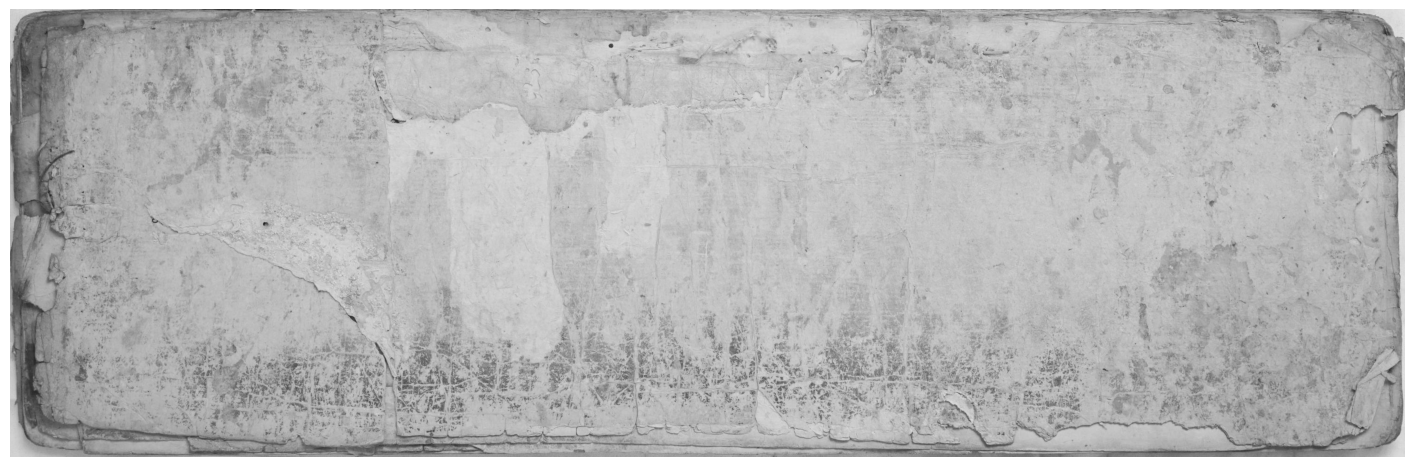

In [7]:
DEFAULT_FONT = "fonts/Qomolangma-Betsu.ttf"
FRONT_SIZE = 28
BACKGROUNDS = glob("backgrounds/*.jpg")
font = ImageFont.truetype(DEFAULT_FONT, size=FRONT_SIZE)
print(len(BACKGROUNDS))

background_img = cv2.imread(BACKGROUNDS[12], 0)
print(background_img.shape)
show_image(background_img)

In [8]:
dataset = "kangyur"
label_dir = os.path.join("texts", dataset)
label_files = natsorted(glob(f"{label_dir}/*.txt"))
print(f"Processing {len(label_files)}")

output_dir = str(os.path.join("output", dataset))
font_generator = AdvancedSyntheticImageGenerator(DEFAULT_FONT, output_dir, distort_image=True, add_background=True, jiggle_line=True)

Processing 40


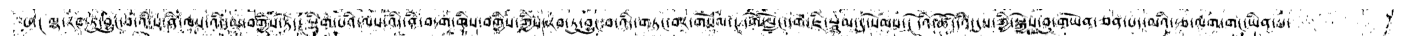

In [9]:
# check single sample
volume = "texts/kangyur/v003_plain.txt"
volume_id = get_filename(volume)
pages = get_pages(volume)

p_idx = 4
line_imgs = []
lines = pages[p_idx].split("\n")

for l_idx, line in enumerate(lines):
        line_img = font_generator.generate_line(line=line, font=font, background=background_img)
        line_imgs.append(line_img)
        #font_generator.save_line_label(line_img, p_idx, l_idx, line, volume_id)


show_image(line_imgs[1])

In [10]:
#run on some volumes
for _, volume in enumerate(label_files[:2]):
    #volume = "texts/kangyur/v001_plain.txt"
    volume_id = get_filename(volume)

    pages = get_pages(volume)

    for p_idx, page in tqdm(enumerate(pages), total=len(pages)):
        lines = page.split("\n")
        lines = [x.replace("\n", "") for x in lines]
        lines = [x for x in lines if lines != ""]

        for l_idx, line in enumerate(lines):
                
                try:
                    line_img = font_generator.generate_line(line=line, font=font, background=background_img)
                    font_generator.save_line_label(line_img, p_idx, l_idx, line, volume_id)
                except Exception as e:
                    print(f"Failed to generate image in {volume}, line {l_idx}: {line}")
                    print(e)

100%|██████████| 633/633 [02:29<00:00,  4.24it/s]
